This program simulates a random walk on the n-cycle. It has two graph outputs:
- A bar graph of the proportion of time the walk spent at each state, with a dotted reference line showing the uniform distribution
- A line graph of the total variation distance at each step between the proportion of time spent at each state and the uniform distribution
and prints out the total variation distance from the uniform distribution at the last step of the walk

In [1]:
## Random walk on the n-cycle
## Produces a bar graph of the proportion of time spent at each state after s steps and 
## a line plot of the total variation distance from the uniform distribution at each step.
## Prints the total variation between the final distribution of the walk and the 
## uniform distribution.
#
## n = size of cycle (number of vertices)
## p = P(X, X+1)
## s = number of steps
ncycle <- function(n, p, s) {
  numSteps <- rep(0, n) #vector of the number of visits to each state (initialized to 0 for all states)
  Proportions <- rep(0, n) #vector of the proportion of time spent at each state (initialized to 0 for all states)
  
  x = floor(runif(1)*n + 1) #starting state: random integer between 1 and n
  step <- 0 #counter of which step we're on, starts at 0
  TotalVariation <- c() #will be a vector of the total variation from uniform at each step
  
  ## run the walk for s steps
  for (i in 1:s) {
    if (runif(1) < p) { #with probability p
      if (x != n) { #if the current state is not n
        x <- x + 1 #move up 1
      } else { #if the current state is n
        x <- 1 #move to 1
      }
    } else { #with probability 1-p
      if (x != 1) { #if the current state is not 1
        x <- x - 1 #move down 1
      } else { #if the current state is 1
        x <- n #move to n
      }
    }
    numSteps[x] <- numSteps[x] + 1 #record the visit to the new state
    step <- step + 1 #increase the step counter
    
    # update the proportions
    for (i in 1:n) {
      Proportions[i] <- numSteps[i] / step
    }
    
    # calculate total variation from the uniform distribution for the current step
    currTV <- 0 
    for (i in 1:n) {
      currTV <- currTV + abs(Proportions[i] - 1/n)
    }
    currTV <- 0.5*currTV
    TotalVariation <- c(TotalVariation, currTV) #add this step's total variation to the vector 
  } 
  
  # Proportions vector after the final step, but with each entry rounded to 3 decimal places
  ProportionsRounded <- Proportions 
  for (i in 1:n) {
    ProportionsRounded[i] <- round(Proportions[i], digits=3)
  }

  finalTV <- TotalVariation[s] #total variation at the final step
  print(paste("Total variation distance from the uniform distribution:", round(finalTV, digits=3)))
  
  # create the graphs
  #par(mfrow=c(1,2), oma = c(0, 0, 2, 0)) #split viewer window so we can display two graphs at once
  
  # Bar graph of the proportion of time spent at each state
  cycleplot <- barplot(ProportionsRounded, names=c(1:n), xlab="State", 
                       ylab="Proportion of steps", 
                       main=paste("Random walk on the", n, "cycle for", s, "steps, p =", p))
  text(x = cycleplot, y = ProportionsRounded, label = ProportionsRounded, pos=1, cex = 0.8, col = "black")
  abline(h=1/n, col="blue", lty=2) #reference line for the uniform distribution
  
  # Plot of the total variation at each step
  plot(TotalVariation, type="l", xlab="Step", ylab="Total variation distance from uniform",
       main="Total Variation")
  #mtext(paste("Random Walk on the", n, "cycle for", s, "steps, p =", p), outer=TRUE, cex=1.5)
}


Let's try a random walk on the 6-cycle for 300 steps with p=0.5:

[1] "Total variation distance from the uniform distribution: 0.02"


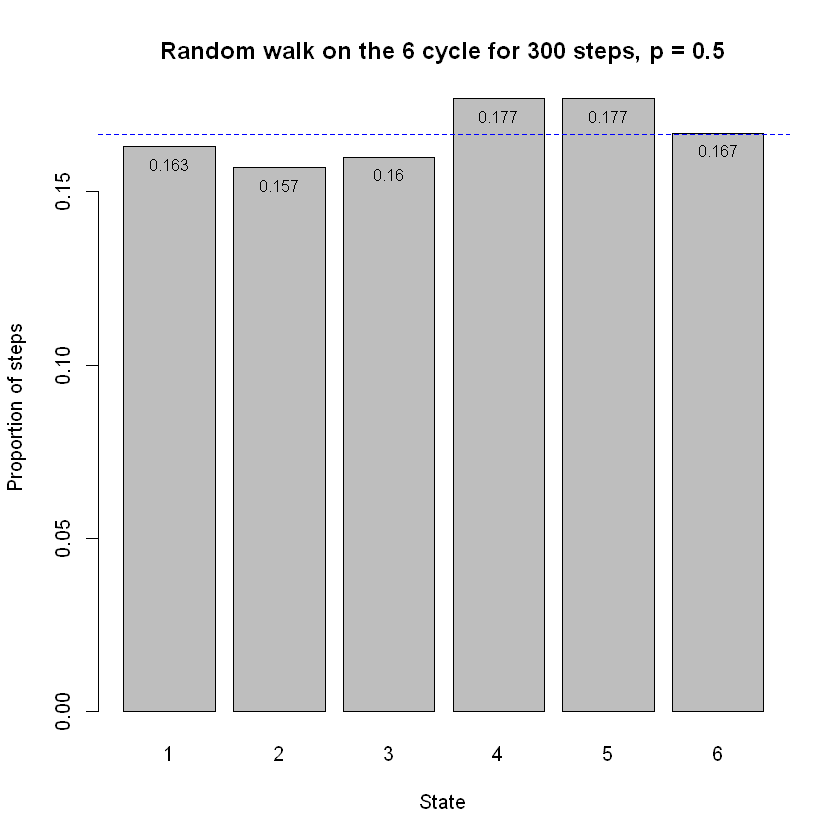

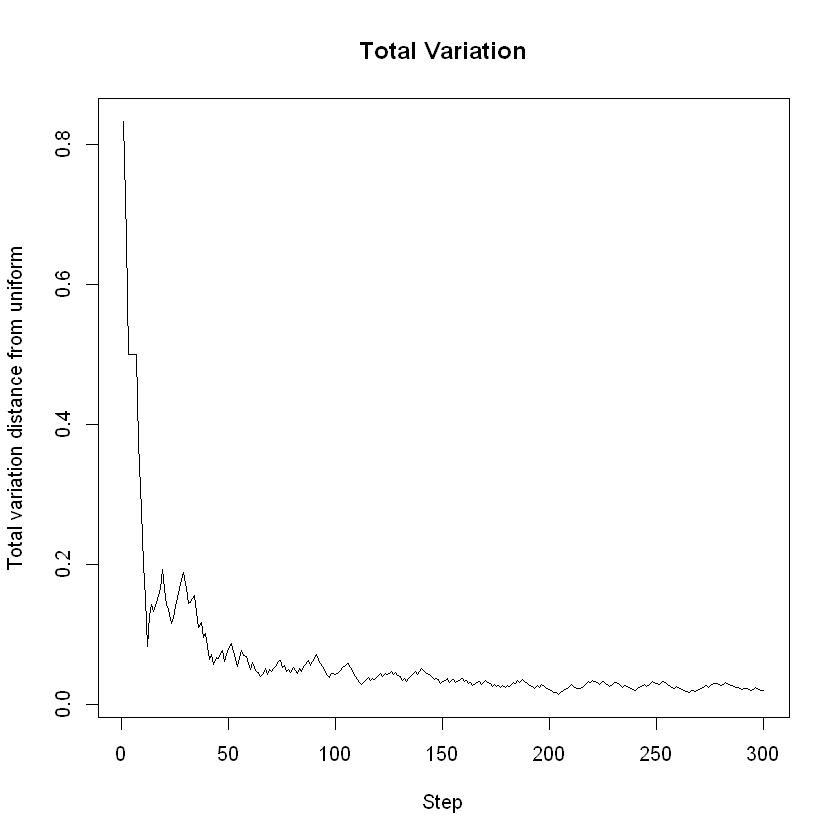

In [2]:
ncycle(n=6, p=0.5, s=300)